In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")



house=pd.read_csv('house_amesterdam.csv')
house=house.drop("Unnamed: 0",axis=1)
house.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [2]:
             ##exploration donnees ##
print("ligne =>",house.shape[0])
print("colonnes =>",house.shape[1])


ligne => 924
colonnes => 7


valeurs manquantes ==> 
Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64


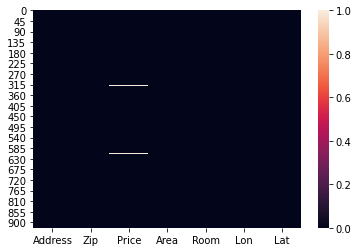

In [3]:
import seaborn as sns
sns.heatmap(house.isna())
print("valeurs manquantes ==> ")
print(house.isna().sum())

In [4]:
print(house.dtypes.value_counts())
house.dtypes


float64    3
int64      2
object     2
dtype: int64


Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object

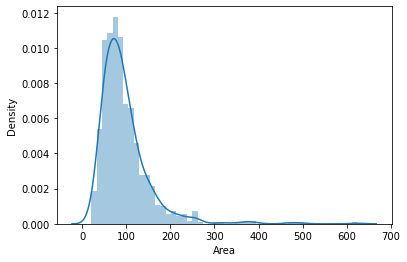

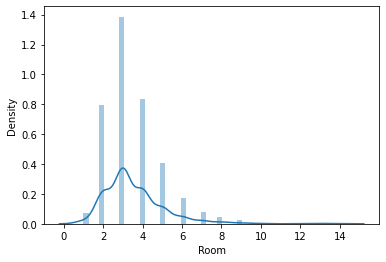

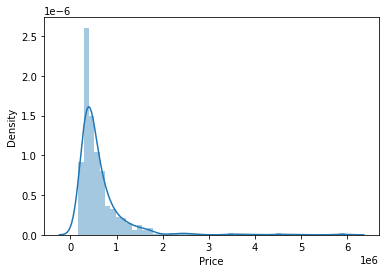

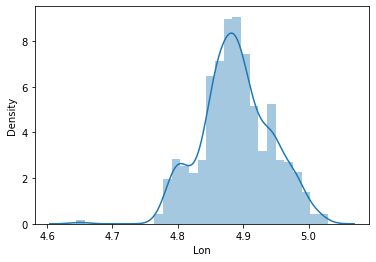

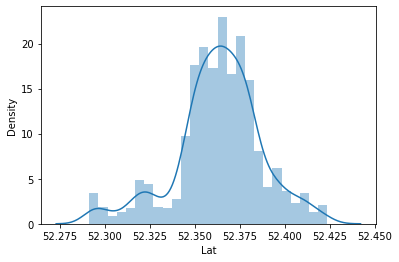

In [5]:
for col in house.select_dtypes('int64'):
    plt.figure()
    sns.distplot(house[col])

for col in house.select_dtypes('float64'):
    plt.figure()
    sns.distplot(house[col])



Price    2.905147e+11
Area     3.300200e+03
Room     2.500000e+00
Lon      0.000000e+00
Lat      0.000000e+00
dtype: float64
          Price      Area      Room       Lon       Lat
Price  1.000000  0.835090  0.623448 -0.013561  0.062196
Area   0.835090  1.000000  0.812421  0.012196  0.017993
Room   0.623448  0.812421  1.000000 -0.036585 -0.016381
Lon   -0.013561  0.012196 -0.036585  1.000000 -0.184436
Lat    0.062196  0.017993 -0.016381 -0.184436  1.000000


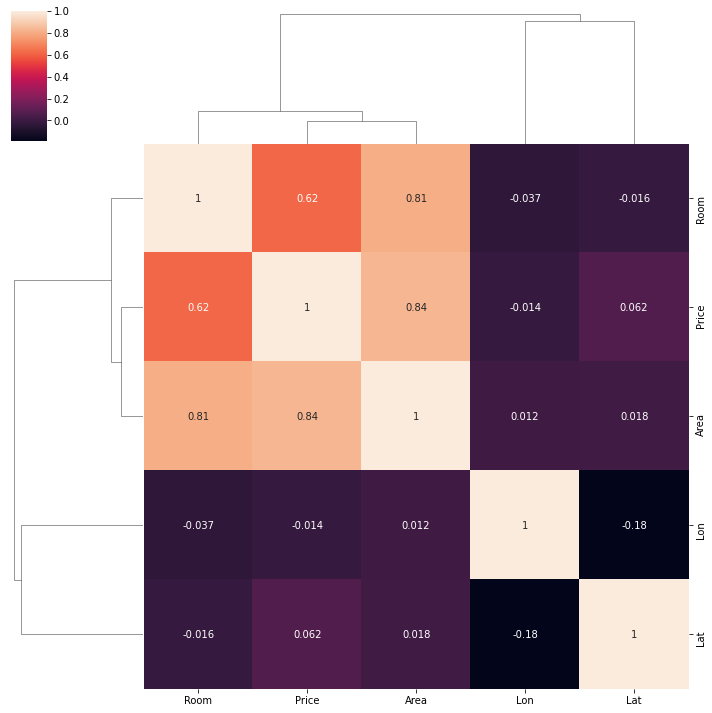

In [6]:
#sns.countplot(house['Room'])
print(round(house.var(),1))
print(house.corr())
#sns.heatmap(house.corr(),annot=True)
sns.clustermap(house.corr(),annot=True)

In [7]:
from sklearn.preprocessing import *
from sklearn.model_selection import *

############# preprocessing ###########

def imputer(data):
    data.dropna(axis=0,inplace=True)
    data1=data.drop(['Address','Zip'],axis=1,inplace=True)
    return data1

def standarisation(data):
    trans=StandardScaler()
    trans.fit(data)
    data1=trans.transform(data)
    
    return data1



def donnees(data):
    imputer(data)
    standarisation(data)
    
    y=data['Price']
    x=data.drop('Price',axis=1)
    
    
    return x,y

x,y=donnees(house)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)



(736, 4)
(736,)
(184, 4)
(184,)


0.7612032440613222


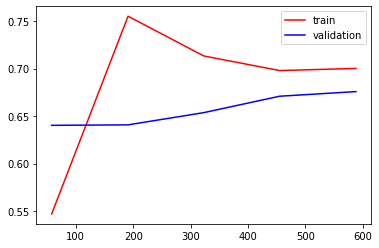

0.7612032440613222

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

def evaluation(modele):
    modele.fit(xtrain,ytrain)
    ypred=modele.predict(xtest)
    score=modele.score(xtest,ytest)
    print(score)
    N,train_score,val_score=learning_curve(modele,xtrain,ytrain,train_sizes=np.linspace(0.1,1,5),cv=5)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),c='r',label='train')
    plt.plot(N,val_score.mean(axis=1),c='b',label='validation')
    plt.legend()
    plt.show()
    
    return score

mod=LinearRegression()
evaluation(mod)



SVR
-0.12822607758093918


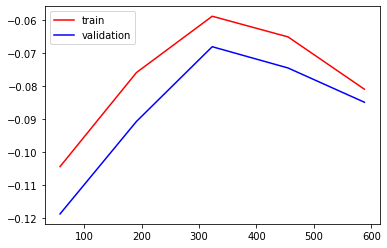


LogisticRegression
0.02717391304347826


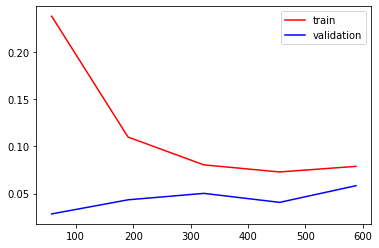


DecisinTreeRegressor
0.3235972282426791


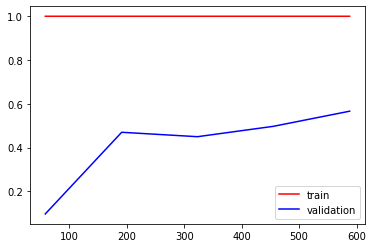


KneighborsRegressor
0.6548109634552717


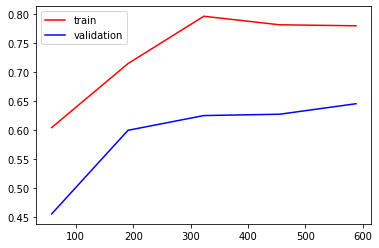


SGDR
-7494936653368.273


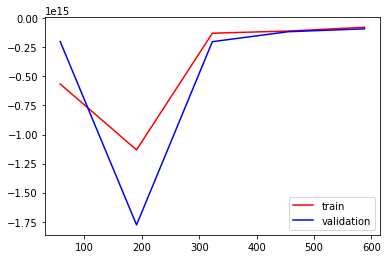


Ridge
0.7624042403939161


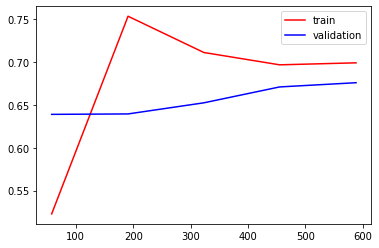


GradientBoostingReg
0.7427680014889099


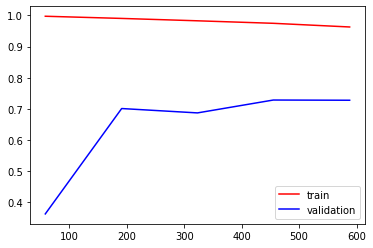

In [93]:
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import *
from sklearn.feature_selection import *

SV=make_pipeline(SelectKBest(f_regression,k=4),SVR())
LG=make_pipeline(SelectKBest(f_regression,k=4),LogisticRegression(random_state=0))
DTR=make_pipeline(SelectKBest(f_regression,k=4),DecisionTreeRegressor(random_state=0))
KNR=make_pipeline(SelectKBest(f_regression,k=4),KNeighborsRegressor())
SGDR=make_pipeline(SelectKBest(f_regression,k=4),SGDRegressor(random_state=0))
RD=make_pipeline(SelectKBest(f_regression,k=4),Ridge())
GR=make_pipeline(SelectKBest(f_regression,k=4),GradientBoostingRegressor())


liste_modele={
    'SVR':SV,
    'LogisticRegression':LG,
    'DecisinTreeRegressor':DTR,
    'KneighborsRegressor':KNR,
    'SGDR':SGDR,
    'Ridge':RD,
    'GradientBoostingReg':GR,
}

for cle,modele in liste_modele.items():
    print(cle)
    evaluation(modele)
    print("")
    
    
    


In [102]:
          ## optimisation ##

print(LN.get_params())
print("")
params={
    'linearregression__copy_X':[True,False],
    'linearregression__fit_intercept':[True,False],
    'linearregression__positive': [False,True],
    'linearregression__normalize': [True,False],
    'selectkbest__k':np.arange(0,4)
}
grid=GridSearchCV(LN,params,cv=4)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
print("")
print("best score=>",grid.best_score_)



{'memory': None, 'steps': [('selectkbest', SelectKBest(k=4, score_func=<function f_regression at 0x0FC33AE0>)), ('linearregression', LinearRegression())], 'verbose': False, 'selectkbest': SelectKBest(k=4, score_func=<function f_regression at 0x0FC33AE0>), 'linearregression': LinearRegression(), 'selectkbest__k': 4, 'selectkbest__score_func': <function f_regression at 0x0FC33AE0>, 'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': None, 'linearregression__normalize': False, 'linearregression__positive': False}

{'linearregression__copy_X': True, 'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'linearregression__positive': False, 'selectkbest__k': 2}

best score=> 0.6859468081372122


best score => 0.8337515984479839


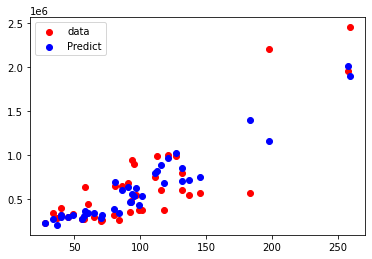

In [114]:
from sklearn.ensemble import *

modele_principal=StackingRegressor([('dtr',DTR),('sgdr',SGDR),('knr',KNR),('rd',RD),('gr',GR)],final_estimator=LinearRegression())
modele_principal.fit(xtrain,ytrain)
ypred=modele_principal.predict(xtest)
print("best score =>",modele_principal.score(xtest,ytest))

plt.scatter(xtest.iloc[0:40,0],ytest.iloc[0:40],c='r',label="data")
plt.scatter(xtest.iloc[0:40,0],ypred[0:40],c='b',label='Predict')
plt.legend()